In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from keras.preprocessing import image
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib inline
from sklearn.model_selection import train_test_split
import pandas as pd
import keras.utils as image

path = "/content/drive/MyDrive/3D Conformer/Multi-Label Representation of Adverse Covid Drug Reactions.csv"
import csv
import pandas as pd
df = pd.read_csv(path)
df

,PubChem_ID,0,1,2,3,4,5,6,7,8,...,19,20,21,22,23,24,25,26,27,28
0,121304016,0,0,0,1,0,1,0,0,0,...,1,0,0,1,1,0,1,0,1,0
1,5743,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,1,1,0
2,3652,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
3,131411,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,6167,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
5,64927,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
6,44205240,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
7,132274054,0,0,0,0,0,0,0,1,1,...,0,1,0,0,1,1,0,0,1,0
8,134223875,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,1,1,0
9,135626798,0,0,0,0,0,1,0,1,1,...,0,0,0,0,1,1,0,1,1,0


In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import img_to_array
df['PubChem_ID'] = df['PubChem_ID'].apply(str)
df_image = []
for i in tqdm(range(df.shape[0])):
    img = image.load_img('/content/drive/MyDrive/3D Conformer/Conformer/'+df['PubChem_ID'][i]+'.png',target_size=(256,256,3))
    img = image.img_to_array(img)
    img = img/255
    df_image.append(img)
X = np.array(df_image)

100%|██████████| 17/17 [00:04<00:00,  3.41it/s]


In [ ]:
y = np.array(df.drop(['PubChem_ID'],axis=1))
y.shape

(17, 29)

In [ ]:
X.shape

(17, 256, 256, 3)

In [ ]:
# import the necessary packages
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2,MobileNet
from tensorflow.keras.layers import AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import os

In [ ]:
from keras.backend import sigmoid
#def swish(x, beta = 1):
#    return (x * sigmoid(beta * x))
# Getting the Custom object and updating them
#from keras.utils.generic_utils import get_custom_objects
#from keras.layers import Activation

# Below in place of swish you can take any custom key for the name
#get_custom_objects().update({'swish': Activation(swish)})

In [ ]:
import numpy as np
#from getdata import load
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import hamming_loss
from keras import backend as K
#K.set_image_dim_ordering('th')

model = Sequential()
model.add(Convolution2D(64, kernel_size=(3, 3),padding='same',input_shape=(256,256,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(29))
model.add(Activation('sigmoid'))

In [ ]:
#sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
import tensorflow as tf
opt = tf.keras.optimizers.Adam(
     learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
     name='Adam')
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
loo.get_n_splits(X)

from sklearn.datasets import make_circles
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import hamming_loss
import numpy as np

def main_accuracy_score(y_test, y_pred):
    # y_pred is a numpy array, y_test is a dataframe
    # to compare the two, convert to a single type
    y_test = y_test#.to_numpy()

    # shape of test and preds must be equal
    assert y_test.shape == y_pred.shape
    i=0
    # list of scores for each training sample
    scores = []

    # for each test sample
    while i < len(y_test):
        count=0
        # count the number of matches in the sample
        # y_test[i] -> row values in test set (true values)
        # y_pred[i] -> row values in predictions set (predicted values)
        for p, q in zip(y_test[i], y_pred[i]):
            if p == q:
                count += 1

        # accuracy score for the sample = no. of correctly predicted labels/total no. of labels
        scores.append(count / y_pred.shape[1])
        i+=1

    # final accuracy = avg. accuracy over all test samples =
    # sum of the accuracy of all training samples/no. of training samples
    return round((sum(scores)/len(y_test)), 5)

stdma=[]
stdhl=[]
stdsa=[]
stdp=[]
stdr=[]
stdf=[]
stdroc=[]
y_predictedvalues=[]
y_predictedvalues1=[]
y_testedvalues=[]

model_history = []
i=1
for train_index, test_index in loo.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    #print(X_train, X_test, y_train, y_test)

    print("Training on Fold: ",i)
    i=i+1

    history_model = model.fit(X_train , y_train, validation_split=0.2, epochs=10, batch_size = 32, verbose=0)

    y_pred = model.predict(X_test)
    y_pred1 = np.where(y_pred > 0.5, 1, 0)
    y_predictedvalues.append(y_pred)
    y_predictedvalues1.append(y_pred1)

    y_testedvalues.append(y_test)


Training on Fold:  1
1/1 [==============================] - 0s 144ms/step
Training on Fold:  2
1/1 [==============================] - 0s 60ms/step
Training on Fold:  3
1/1 [==============================] - 0s 84ms/step
Training on Fold:  4
1/1 [==============================] - 0s 61ms/step
Training on Fold:  5
1/1 [==============================] - 0s 75ms/step
Training on Fold:  6
1/1 [==============================] - 0s 82ms/step
Training on Fold:  7
1/1 [==============================] - 0s 60ms/step
Training on Fold:  8
1/1 [==============================] - 0s 69ms/step
Training on Fold:  9
1/1 [==============================] - 0s 75ms/step
Training on Fold:  10
1/1 [==============================] - 0s 49ms/step
Training on Fold:  11
1/1 [==============================] - 0s 84ms/step
Training on Fold:  12
1/1 [==============================] - 0s 77ms/step
Training on Fold:  13
1/1 [==============================] - 0s 58ms/step
Training on Fold:  14
1/1 [===================

In [ ]:
y_test = np.reshape(y_testedvalues, (17, 29))

print(y_test.shape)  # Check the shape of the 2D array

(17, 29)


In [ ]:
df = pd.DataFrame(y_test)
df

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,0,0,0,1,0,1,0,0,0,1,...,1,0,0,1,1,0,1,0,1,0
1,0,0,0,0,0,0,0,0,0,1,...,1,0,1,0,1,0,1,1,1,0
2,0,1,0,0,0,0,0,0,1,1,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
5,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
6,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
7,0,0,0,0,0,0,0,1,1,0,...,0,1,0,0,1,1,0,0,1,0
8,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,1,1,0
9,0,0,0,0,0,1,0,1,1,1,...,0,0,0,0,1,1,0,1,1,0


In [ ]:
#Ploat CoOccurence
df_asint = y_test.astype(int)
coocc = df_asint.T.dot(df_asint)
coocc = pd.DataFrame(coocc)
np.fill_diagonal(coocc.values,0)
coocc
Actual_y=coocc

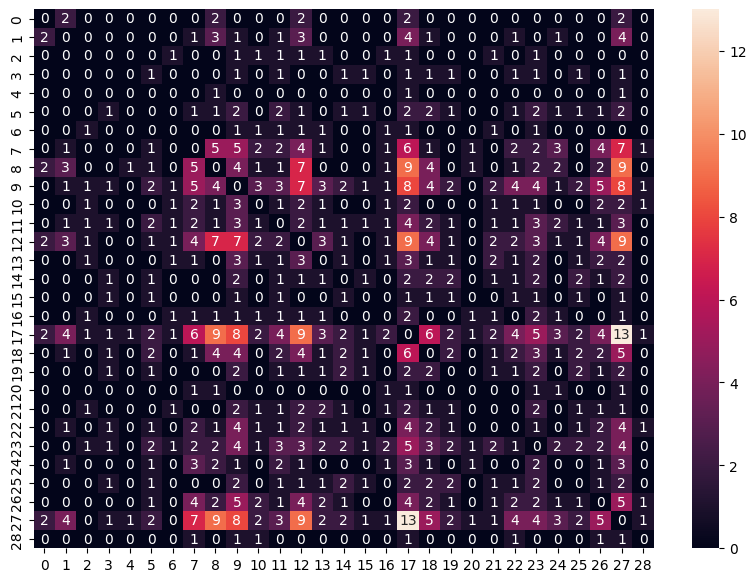

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming coocc is your DataFrame or array containing the data for the heatmap

# Set the size of the plot
plt.figure(figsize=(10, 7))  # Adjust the values (width, height) as needed

# Create the heatmap
sns.heatmap(coocc, annot=True, fmt="d")

# Display the heatmap
plt.show()

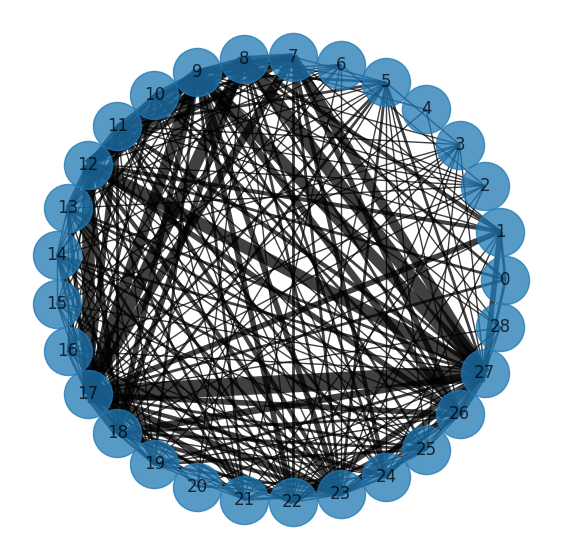

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Assuming you have defined 'coocc' somewhere

A = np.matrix(coocc)
G = nx.from_numpy_array(A)
weights = [G[u][v]['weight'] for u, v in G.edges()]

# Set the figure size
fig, ax = plt.subplots(figsize=(7, 7))

# Draw the graph with edge size given by the weight
nx.draw_circular(G, ax=ax, width=weights, alpha=0.75, with_labels=True, font_color='black', node_size=1200)

plt.show()

In [ ]:
y_pred = np.reshape(y_predictedvalues1, (17, 29))

print(y_pred.shape)  # Check the shape of the 2D array

(17, 29)


In [ ]:
df = pd.DataFrame(y_pred)
df

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,1,...,1,0,1,0,1,0,1,1,1,0
2,0,1,0,0,0,0,0,0,1,1,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
5,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
6,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
7,0,0,0,0,0,0,0,1,1,0,...,0,1,0,0,1,1,0,0,1,0
8,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,1,1,0
9,0,0,0,0,0,1,0,1,1,1,...,0,0,0,0,1,1,0,1,1,0


In [ ]:
#Ploat CoOccurence
df_asint = y_pred.astype(int)
coocc = df_asint.T.dot(df_asint)
coocc = pd.DataFrame(coocc)
np.fill_diagonal(coocc.values,0)
coocc
Predicted_y=coocc

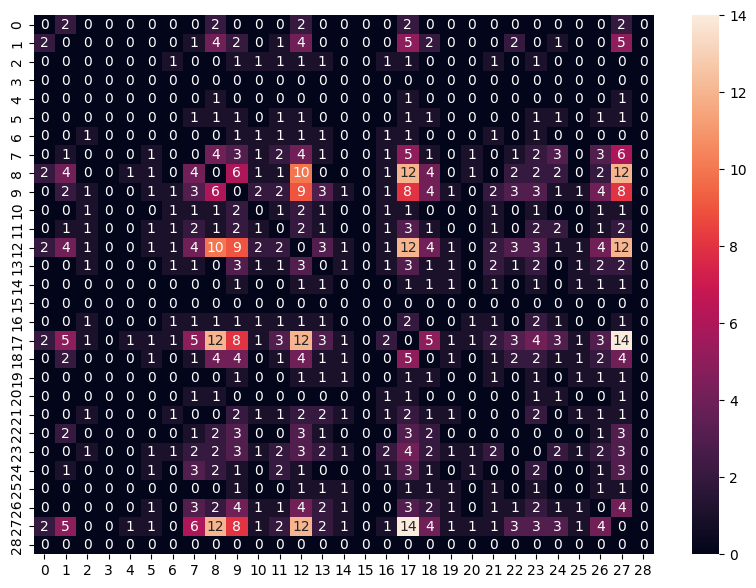

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Set the size of the plot
plt.figure(figsize=(10, 7))  # Adjust the values (width, height) as needed

# Create the heatmap
sns.heatmap(coocc, annot=True, fmt="d")

# Display the heatmap
plt.show()

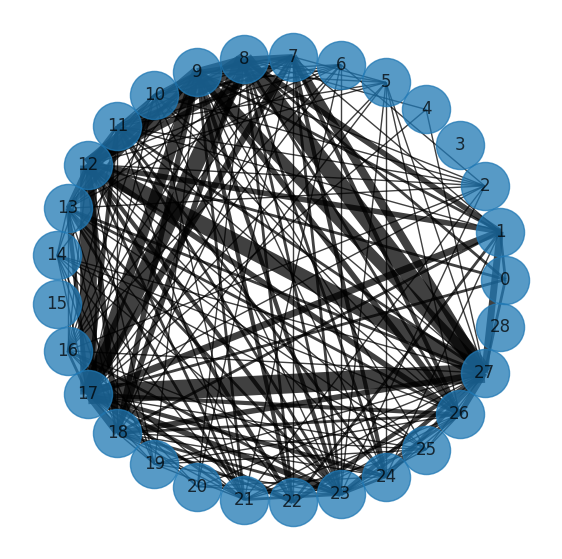

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Assuming you have defined 'coocc' somewhere

A = np.matrix(coocc)
G = nx.from_numpy_array(A)
weights = [G[u][v]['weight'] for u, v in G.edges()]

# Set the figure size
fig, ax = plt.subplots(figsize=(7, 7))

# Draw the graph with edge size given by the weight
nx.draw_circular(G, ax=ax, width=weights, alpha=0.75, with_labels=True, font_color='black', node_size=1200)

plt.show()


In [ ]:
import pandas as pd

def calculate_accuracy(df1, df2):
    if df1.shape != df2.shape:
        raise ValueError("DataFrames must have the same shape")

    total_entries = 0
    matching_entries = 0

    for i in range(df1.shape[0]):
        for j in range(df1.shape[1]):
            total_entries += 1
            if df1.iloc[i, j] == df2.iloc[i, j]:
                matching_entries += 1

    accuracy = matching_entries / total_entries
    return accuracy

# Example usage:
# Creating two sample DataFrames

df1 = Actual_y


df2 = Predicted_y

accuracy = calculate_accuracy(df1, df2)
print("Accuracy:", accuracy)


Accuracy: 0.7312722948870393
